<h1><center>Coupled Pendulum Analysis</center></h1>

## Theory Overview and 1st order ODEs

<br>

The theoretical equation for motion of a coupled pendulum can be derived as below:  

$$\begin{align*}
    m L^2 \frac{\mathrm{d}^2 \phi_1}{\mathrm{d} t^2} + m g L \sin \phi_1 &=  -k l^2 \cos \phi_1 ( \sin \phi_1 - \sin \phi_2 ) \\
    m L^2 \frac{\mathrm{d}^2 \phi_2}{\mathrm{d} t^2} + m g L \sin \phi_2 &=  +k l^2 \cos \phi_2 ( \sin \phi_1 - \sin \phi_2 ) \\
\end{align*}$$

*Derivation can be found here https://www.physics.utoronto.ca/~sandra/PHY238Y/Lectures/Lect4_Coupl_osc.pdf*

<br>
To convert these into a form that numerical integrators understand(first order DEs), we make some substitutions:
<br>

$$\begin{align*}
    \text{Let } \dot{\phi}_1 &= \frac{\mathrm{d} \phi_1}{\mathrm{d} t} \\
    \dot{\phi}_2 &= \frac{\mathrm{d} \phi_2}{\mathrm{d} t} \\
    \therefore\: \frac{\mathrm{d}^2 \phi_1}{\mathrm{d} t^2} &= \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} \\
    \frac{\mathrm{d}^2 \phi_2}{\mathrm{d} t^2} &= \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t}
\end{align*}$$

<br>
This transforms our ODEs into the four first order ODEs:
<br>

$$\begin{align*}
    \frac{\mathrm{d} \phi_1}{\mathrm{d} t} &= \dot{\phi}_1 \\
    \frac{\mathrm{d} \phi_2}{\mathrm{d} t} &= \dot{\phi}_2 \\
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \sin \phi_1 - k l^2 \cos \phi_1 (\sin \phi_1 - \sin \phi_2)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \sin \phi_2 + k l^2 \cos \phi_2 ( \sin \phi_1 - \sin \phi_2)}{m L^2}
\end{align*}$$

<br>

To make calculations simple throughout the experiment we made the small angle approximation and assumed $\sin(\phi_1)=\phi_1$ and $\cos(\phi_1) = \phi_1$. This assumption will be rigurously tested later on. Therefore the above equations become:

<br>

$$\begin{align*}
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \phi_1 - k l^2 (\phi_1 - \phi_2)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \phi_2 + k l^2 (\phi_1 - \phi_2)}{m L^2}
\end{align*}$$

<br>
In summary the 4 coupled 1st order ODE's are below:
<br>

$$\begin{align*}
    \frac{\mathrm{d} \phi_1}{\mathrm{d} t} &= \dot{\phi}_1 \\
    \frac{\mathrm{d} \phi_2}{\mathrm{d} t} &= \dot{\phi}_2 \\
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \phi_1 - k l^2 (\phi_1 - \phi_2)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \phi_2 + k l^2 (\phi_1 - \phi_2)}{m L^2}
\end{align*}$$

## Constants used 

* Gravity (g) was found online
* The length of the pendulum (L) was measured during the experiment 
* Spring constant (k) was found experimentally during the experiment
* The mass (m) of the pendulum was measured during the experiment

$$\begin{align*}
g &= 9.8 \:\mathrm{m \cdot s^{-2}} \\
L &= 0.975 \:\mathrm{N \cdot m^{-1}} \\
k &= 3.108 \:\mathrm{m} \\
m &= 1 \:\mathrm{kg}
\end{align*}$$

In [1]:
# import the required libraries and set the constants

import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy
import scipy.constants, scipy.integrate
from scipy.integrate import odeint
import pandas as pd
from dotenv import load_dotenv
import os

%matplotlib inline


g = 9.8
L = 0.975
k = 3.108
m = 1

## Function 1 

This function looks to take four dependent variables and return its derivative so it can be used in a numerical integrator. The user inputs a 4 item list containing [$\left(\phi_1, \phi_2, \dot{\phi}_1, \dot{\phi}_2\right)$] and the function will return the list [$\left(\dot{\phi}_1, \dot{\phi}_2,   \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t},   \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t}\right)$].

In [2]:
def f(a,t,l):
    return [a[2],a[3],(-k * l ** 2 * (a[0] - a[1]) - m * g * L * a[0]) / (m * L ** 2),
           (k * l ** 2 * (a[0] - a[1]) - m * g * L * a[1]) / (m * L ** 2)]

We will now look to use scipy.integrate.odeint to solve the ODE's listed in the theory section of this report and plot the results.

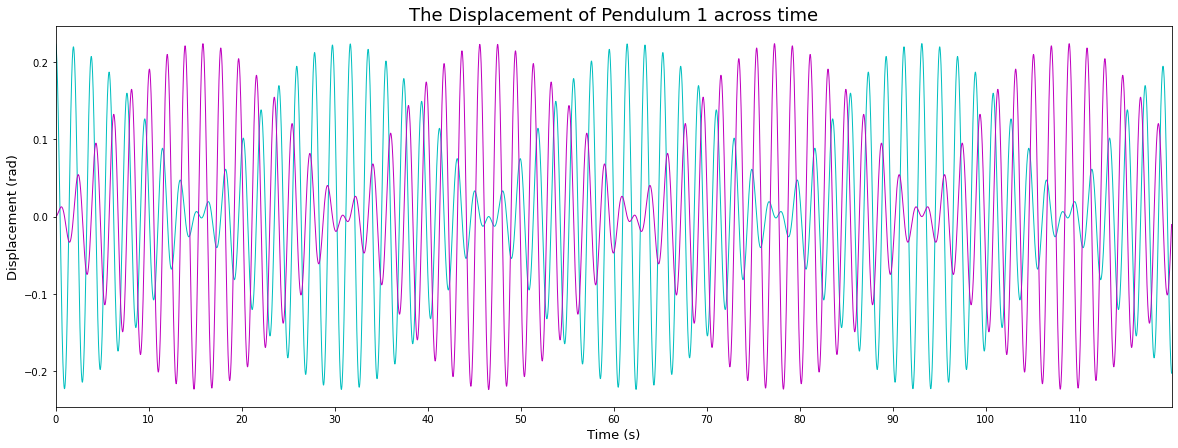

In [3]:
l = 0.45 #this refers to the situation in which the spring is located somewhat in the centre of the pendulum
t = np.linspace(0, 120.0, 21473)
solution = odeint(f, [0.2245, 0.0 , 0.0, 0.0], t, args = (l,))
"""
why these starting conditions were chosen will be made clearer further below. But clearly we have a situation 
where we expect a beating behavior in our results as at t=0, the first angle is at 0.2245 radians whilst the 
second angle is at 0.

"""
phi_1 = [] 
phi_2 = []
for i in solution:
    phi_1.append(i[0])
    phi_2.append(i[1])

plt.figure(figsize = (20,7))
plt.plot(t,phi_1, linewidth = 1, label = "angle 1", color = "c")
plt.plot(t,phi_2, linewidth = 1, label = "angle 2", color = "m")
plt.xlabel("Time (s)", fontsize = 13)
plt.ylabel("Displacement (rad)", fontsize = 13)
plt.xticks(np.arange(0, 120, step=10))
plt.xlim((0, 120))
plt.legend
plt.title("The Displacement of Pendulum 1 across time", fontsize = 18)
plt.show()    

Great!, this looks just as expected with two coupled pendulums where one begins at a maximum angle whilst the other starts at zero. We can clearly see the beating frequency and how the max amplitude of each beat remains at the starting displacement of 0.2245. Now, lets look at how our experimental data compared to this theoretical model. 

0.2245 was chosen as phi_1 when time=0, as this is equivalent to the magnitude of phi_1 displacement when we conducted the experiment physically. We ran the experiment with the spring in a high, middle and low position on the pendulum, however for the sake of not being repetetive in this report we will keep l = 0.45 and compare results and find insights with the spring in the middle. Though all insights found in this report stand true for whatever value l is (as long as it remains between 0 and the total length of the pendulum). We also chose to study the beating frequency as it seemed the most interesting. 

## Experimental Results Comparison and Friction Analysis

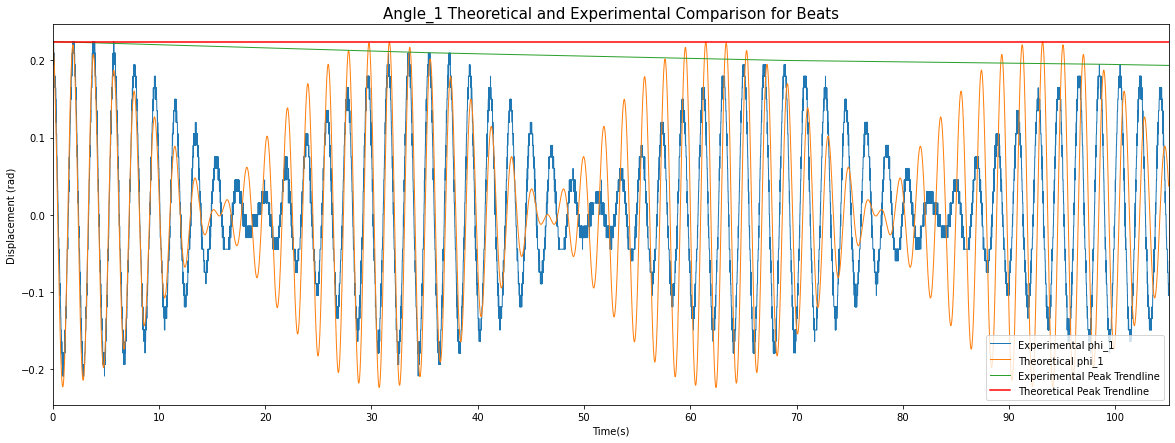

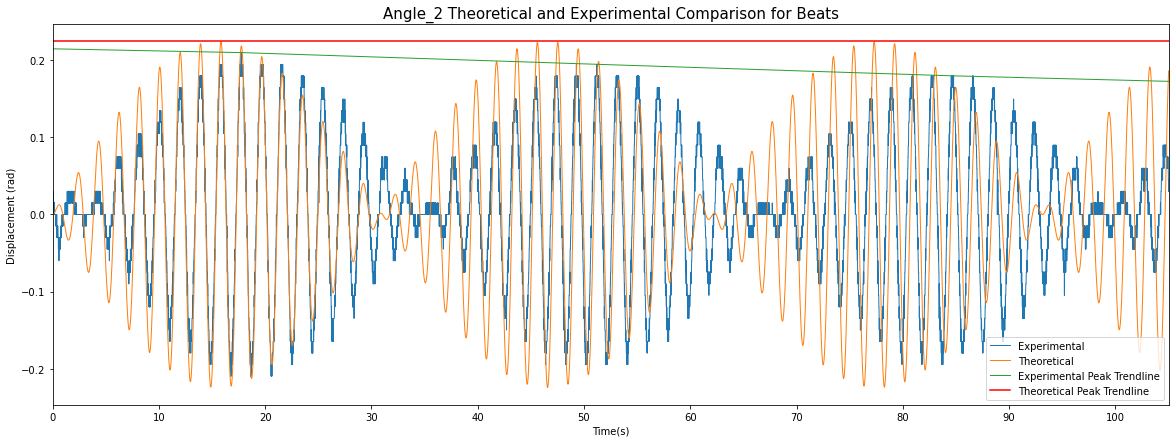

In [4]:
#The first paragraph in this cell loads my experimental data and cleans it such that the time starts 
#when phi_1 is maximum (when I let go of the pendulum).
load_dotenv()
test = pd.read_csv("3-middle", delimiter ="\t") #3-middle is the experimental data which I have included in this repo
test.columns = ["Time","Vol1", "Vol2"]
test = test.iloc[1:]
test["Vol1"]=test["Vol1"].astype(float)
test["Vol2"]=test["Vol2"].astype(float)
test["Time"]=test["Time"].astype(float)
max_index = test[test.Vol1 == abs(max(test["Vol1"]))].index[0]
strt_time = test[test.Vol1 == max(test["Vol1"])].iloc[0].values[0]
test = test[max_index-1:]
test["Time"]=test["Time"]-strt_time

#This paragraph looks to graph the experimental and theoretical data for angle 1 (phi_1)
fig = plt.figure(figsize = (20,7))
plt.plot(test["Time"],test["Vol1"],linewidth = 1, label = "Experimental phi_1")
plt.plot(t,phi_1, linewidth = 1, label = "Theoretical phi_1")
plt.plot([0,35.5,69,99,120],[0.2245,0.21,0.20,0.195,0.19], linewidth = 1, label = "Experimental Peak Trendline")
plt.axhline(y=0.2245, color='r', linestyle='-', label = "Theoretical Peak Trendline")
plt.legend(loc = "lower right")
plt.xticks(np.arange(0, 120, step=10))
plt.xlabel("Time(s)")
plt.ylabel("Displacement (rad)")
plt.xlim(0,105)
plt.title("Angle_1 Theoretical and Experimental Comparison for Beats", fontsize = 15)
plt.show()

#This paragraph looks to graph the experimental and theoretical data for angle 2 (phi_2)
fig = plt.figure(figsize = (20,7))
plt.plot(test["Time"],test["Vol2"],linewidth = 1, label = "Experimental")
plt.plot(t,phi_2, linewidth = 1, label = "Theoretical")
plt.plot([0,18,51,84.5,120],[0.215,0.21,0.195,0.18,0.1675], linewidth = 1, label = "Experimental Peak Trendline")
plt.axhline(y=0.2245, color='r', linestyle='-', label = "Theoretical Peak Trendline")
plt.legend(loc = "lower right")
plt.xticks(np.arange(0, 120, step=10))
plt.xlabel("Time(s)")
plt.ylabel("Displacement (rad)")
plt.xlim(0,105)
plt.title("Angle_2 Theoretical and Experimental Comparison for Beats", fontsize = 15)
plt.show()


Both angles follow a beating shape as expected in the experimental data. However despite looking similar there are two main differences that can be clearly seen. The first and obvious difference is that the experimental and theoretical data seems to be slightly out of phase, this is most evident in the 2nd angle. A study of my experimental data clearly illustrates why, angle 2 does not actually start at 0 like the theoretical model. This was due to a callibration error when conducting the experiment and how after moving pendulum 1, pendulum 2 slightly moved off centre to 0.03 radians. This is evident in the second graph, where we can see at t=0 there is a slight spike in the blue curve, representitive of the angle starting at 0.03 radians. Its important to note that this error in starting phase causes slight errors in both angles particularly at the front. A more interesting insight is the impact friction has on our data. I drew the peak trendlines to visualise this impact. We can clearly see in both pendulum angles the experimental data peak trendline has a negative gradient and is slowly moving towards zero, this trendline tracks the local maximum of each beat and shows that eventually friction will slowly bring the displacement back to zero. Studying the theoretical equations above shows that no friction dependence was taken into account, thus leaving a horizontal trendline.
<br>

Earlier we made the small angle approximation (that $\sin(\phi_1)=\phi_1$ and $\cos(\phi_1) = \phi_1$ ). Lets see the accuracy of our assumption and figure out at what point this assumption blows up.

## Analysis into the small angle approximation

Lets go back to the original 4 ODEs and use odeint to solve it, plot its behavior and compare its solutions to the approximated ODE's from above. The original ODEs are as follows:

$$\begin{align*}
    \frac{\mathrm{d} \phi_1}{\mathrm{d} t} &= \dot{\phi}_1 \\
    \frac{\mathrm{d} \phi_2}{\mathrm{d} t} &= \dot{\phi}_2 \\
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \sin \phi_1 - k l^2 \cos \phi_1 (\sin \phi_1 - \sin \phi_2)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \sin \phi_2 + k l^2 \cos \phi_2 ( \sin \phi_1 - \sin \phi_2)}{m L^2}
\end{align*}$$


## Function 2

The below function takes in the 4 item list [$\left(\phi_1, \phi_2, \dot{\phi}_1, \dot{\phi}_2\right)$] and returns the list [$\left(\dot{\phi}_1, \dot{\phi}_2,   \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t},   \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t}\right)$]. 

In [5]:
def exact(a,t,l):
    return [a[2],a[3],
            (-k * l ** 2 * mt.cos(a[0]) * (mt.sin(a[0]) - mt.sin(a[1])) - m * g * L * mt.sin(a[0])) / (m * L ** 2), 
             (k * l ** 2 * mt.cos(a[1]) * (mt.sin(a[0]) - mt.sin(a[1])) - m * g * L * mt.sin(a[1])) / (m * L ** 2)]

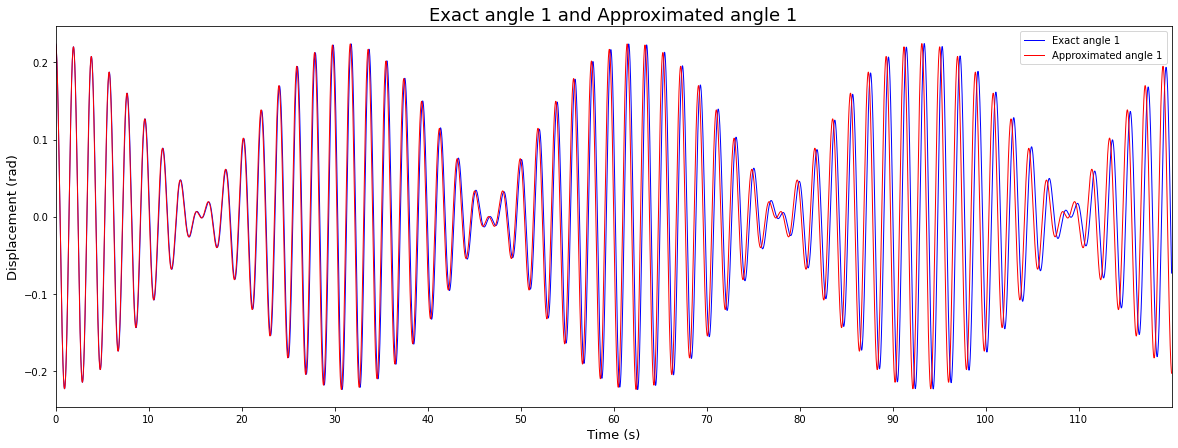

In [6]:
#Calculate the exact angles 

l = 0.45
t = np.linspace(0, 120.0, 21473)
solution = odeint(exact, [0.2245, 0.0 , 0.0, 0.0], t, args = (l,))
exactphi_1 = []
exactphi_2 = []
for i in solution:
    exactphi_1.append(i[0])
    exactphi_2.append(i[1])

#plot the exact angles in blue and approximated angles in red, both against time

plt.figure(figsize = (20,7))
plt.plot(t,exactphi_1, linewidth = 1, label = "Exact angle 1", color = "b")
plt.plot(t,phi_1, linewidth = 1, label = "Approximated angle 1", color = "r")
plt.xlabel("Time (s)", fontsize = 13)
plt.ylabel("Displacement (rad)", fontsize = 13)
plt.xticks(np.arange(0, 120, step=10))
plt.xlim((0, 120))
plt.title("Exact angle 1 and Approximated angle 1", fontsize = 18)
plt.legend()
plt.show()    

Clearly both the exact solution and the approximated solutions look very similar. To begin with they both seem identical but across time they seem to start diverging from eachother. Lets visualise these errors on a log graph. 

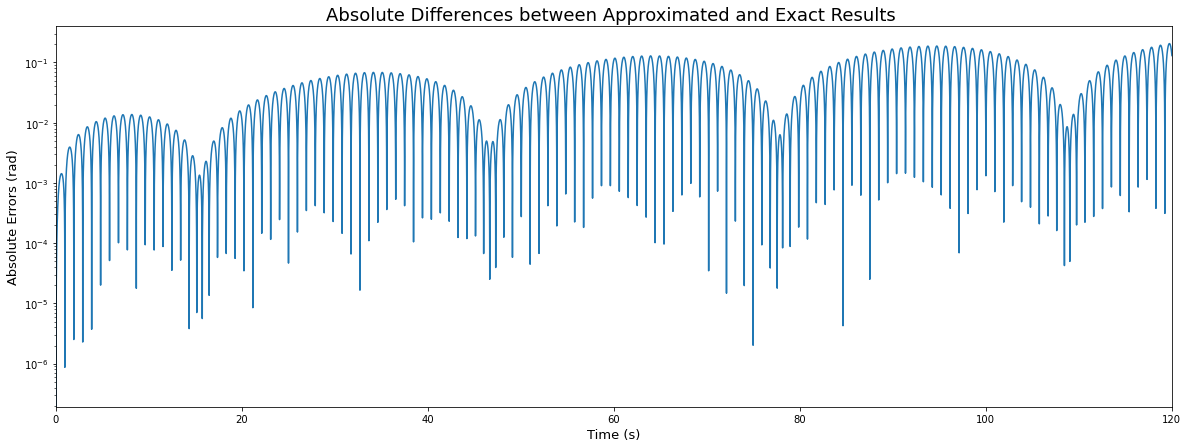

In [7]:
plt.figure(figsize = (20,7))
plt.semilogy(t, np.abs(np.subtract(exactphi_1, phi_1)), label = "errors")
plt.xlabel("Time (s)", fontsize = 13)
plt.ylabel("Absolute Errors (rad)", fontsize = 13)
plt.xlim((0, 120))
plt.title("Absolute Differences between Approximated and Exact Results ", fontsize = 18)
plt.show()

Now, we can clearly see the result of the two graphs diverging from eachother early on. We can see that as time goes on there becomes a greater difference between the exact and approximated solutions. The graph shows that to begin with there is a difference of about $10^{-3}$, however as time goes on the difference starts compounding and after 120 seconds they become become roughly 0.1 radians apart. Thus, if taking data over a long period of time it would be best to not make such an approximation. Lets further look into how the exact and approximated solutions diverge from eachother as the maximum angle is increased. Obviously as we increase the starting angle the approximated solution will become less accurate, though it may still be interesting to see by how much. 

## Large Angles 

Lets see how the difference between the approximated and exact solution change as we start from 0.0001 degrees and move slowly to $\pi$ (vertically down to vertically up). We will run the code via a for loop across 30 evenly distriputed angles and graph the absolute differences between the approximated and exact solution against starting(maximum) angles of pendulum 1. 

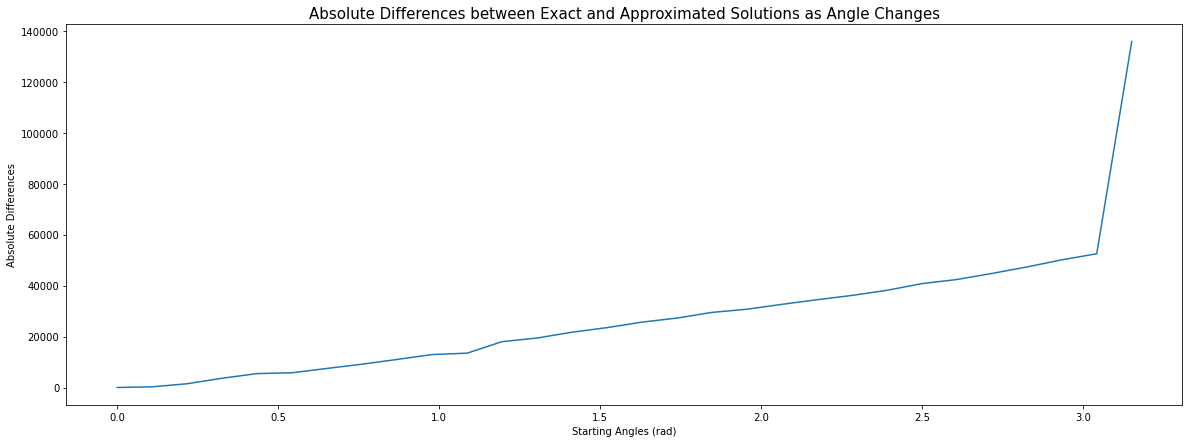

In [8]:
l = 0.45
t = np.linspace(0, 120.0, 21473)
angle_intervals = np.linspace(0.0001, mt.pi+0.01, 30)
diff_sum = []
for m in angle_intervals:
    solution = odeint(exact, [m, 0.0 , 0.0, 0.0], t, args = (l,))
    exactphi_1 = []
    exactphi_2 = []
    for i in solution:
        exactphi_1.append(i[0])
        exactphi_2.append(i[1])

    solution = odeint(f, [m, 0.0 , 0.0, 0.0], t, args = (l,))
    approxphi_1 = []
    approxphi_2 = []
    for i in solution:
        approxphi_1.append(i[0])
        approxphi_2.append(i[1])
        
    differences = abs(pd.Series(approxphi_1).round(4).astype(float) - pd.Series(exactphi_1).round(4).astype(float))
    diff_sum.append(differences.sum())

plt.figure(figsize = (20,7))
plt.plot(angle_intervals, diff_sum)
plt.xlabel("Starting Angles (rad)")
plt.ylabel("Absolute Differences")
plt.title("Absolute Differences between Exact and Approximated Solutions as Angle Changes", fontsize = 15)
plt.show() 

As expected we can clearly see how the differences between the Approximated and Exact solutions change as the angle becomes larger. What is particularly interesting is how there is a large increase in difference as the starting angle suddenly approaches $\pi$. Lets look at what happens when $\phi_1=\pi$ whilst $\phi_2=0$. Physically this will be in the position when 1 pendulum is vertical facing up and the other is vertically facing down. 




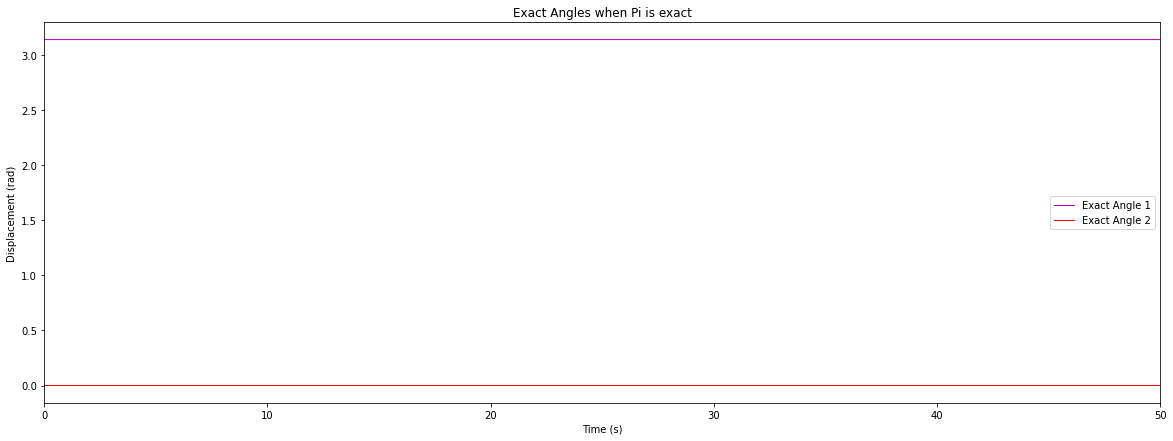

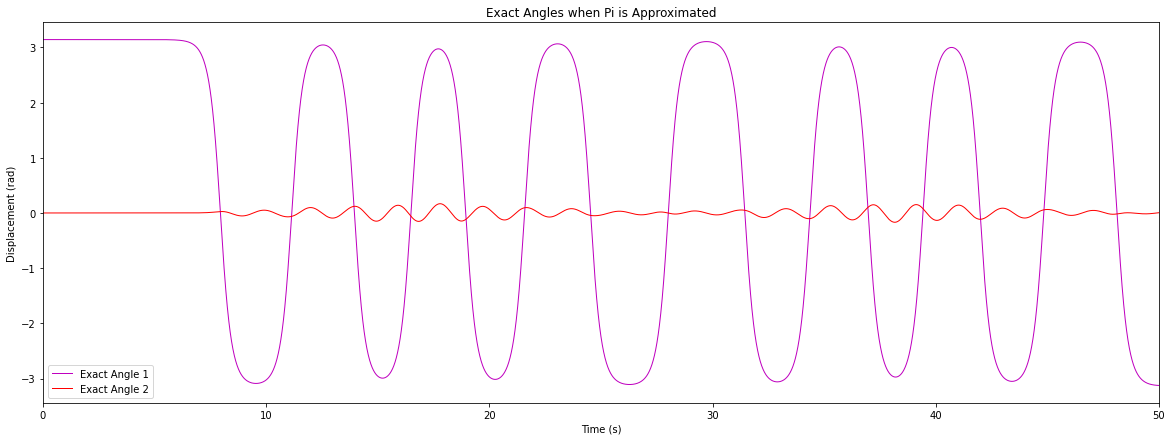

In [9]:
l=0.45

#Pi is Exact 
solution = odeint(exact, [mt.pi, 0.0 , 0.0, 0.0], t, args = (l,))
exact_1 = []
exact_2 = []
for i in solution:
    exact_1.append(i[0])
    exact_2.append(i[1])

plt.figure(figsize = (20,7))
plt.plot(t,exact_1, linewidth = 1, label = "Exact Angle 1", color = "m")
plt.plot(t,exact_2, linewidth = 1, label = "Exact Angle 2", color = "r")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")
plt.xlim((0, 50))
plt.title("Exact Angles when Pi is exact")
plt.legend()
plt.show()    

#Graph when Pi is Approximated
solution = odeint(exact, [3.1415926535, 0.0 , 0.0, 0.0], t, args = (l,))
exact_1 = []
exact_2 = []
for i in solution:
    exact_1.append(i[0])
    exact_2.append(i[1])

plt.figure(figsize = (20,7))
plt.plot(t,exact_1, linewidth = 1, label = "Exact Angle 1", color = "m")
plt.plot(t,exact_2, linewidth = 1, label = "Exact Angle 2", color = "r")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (rad)")
plt.xlim((0, 50))
plt.title("Exact Angles when Pi is Approximated")
plt.legend()
plt.show()    

The graph clearly shows that the Exact solution correctly identifies that the system is in a state of equilibrium where $\phi_1$ remains at $\pi$ and $\phi_2$ remains at 0. There is no external forces perceived to act on the system and hence that makes sense, interestingly we are using pi from the maths library in python, however when we instead used pi as 3.14159.... and manually type it in we found that the pendulum stayed in equilibrium briefly before being moved away from equilibrium (at around 6 seconds in the 2nd graph) due to the gravity having an impact as the pendulum was not "perfectly" vertical 


## Conclusion

Overall, we were able to use a numerical integrator (odeint) to solve coupled 2nd order differential equations and study its accuracy. Furthermore,we were able to understand the equilibrium state, visualise the impact friction had on our experimental data and quantify the errors associated with taking a small angle approximation.